<a href="https://colab.research.google.com/github/vyshnavi2001/NNDL/blob/main/assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [9]:
load_data = pd.read_excel("Load_Data_in_kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [10]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [11]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fee2c71b7d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fee2c720810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fee2c725850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fee2c725310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fee2c71bd50>,
  <matplotlib.lines.Line2D at 0x7fee2c7202d0>]}

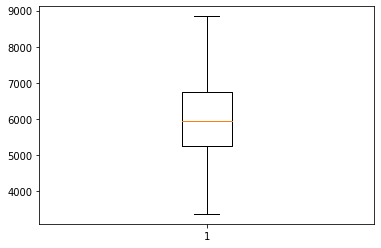

In [16]:
plt.boxplot(load_data.iloc[:,0])

In [17]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [18]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fee2c68e710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fee2c693750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fee2c69b790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fee2c69b250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fee2c68ec90>,
  <matplotlib.lines.Line2D at 0x7fee2c693210>]}

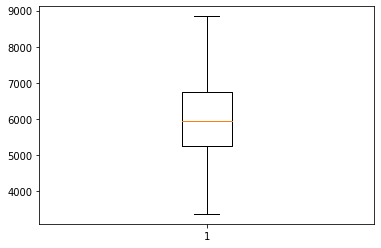

In [19]:
plt.boxplot(load_data.iloc[:,0])

In [20]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

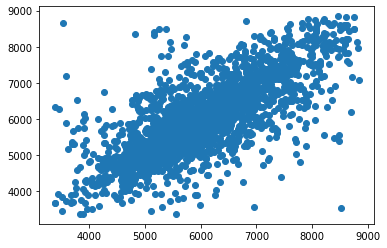

In [21]:
plt.scatter(x,y)

In [22]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c,v_m,v_c,momentum_coeff):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coeff*v_m)*d[i][0]-(c+momentum_coeff*v_c))
  return -1*sum/len(d)

In [23]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500


In [24]:
x = minmax_scale(x)
y = minmax_scale(y)

In [25]:
data = []

for i in range(len(x)):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [28]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c,v_m,v_c,momentum_coeff)
    deltac = -1*learning_rate*gradc(d,m,c,v_m,v_c,momentum_coeff)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)


epoch 0, batch 0, error 0.5005313271866848
epoch 0, batch 1, error 0.47894448349864993
epoch 0, batch 2, error 0.4340315540390328
epoch 0, batch 3, error 0.41193625033961134
epoch 1, batch 0, error 0.3639099457995251
epoch 1, batch 1, error 0.3179392994240733
epoch 1, batch 2, error 0.28345974372325544
epoch 1, batch 3, error 0.24082879747510444
epoch 2, batch 0, error 0.20183100789358432
epoch 2, batch 1, error 0.1661593944230788
epoch 2, batch 2, error 0.12267887982436845
epoch 2, batch 3, error 0.10166949209150744
epoch 3, batch 0, error 0.07668098430206602
epoch 3, batch 1, error 0.05623194947254633
epoch 3, batch 2, error 0.0425128488300111
epoch 3, batch 3, error 0.03162660014298497
epoch 4, batch 0, error 0.02132880775185199
epoch 4, batch 1, error 0.015227456174997133
epoch 4, batch 2, error 0.011807920996032504
epoch 4, batch 3, error 0.009170278562060331
epoch 5, batch 0, error 0.010538339607135218
epoch 5, batch 1, error 0.008419796398344637
epoch 5, batch 2, error 0.0108760

Text(0.5, 1.0, 'error graph')

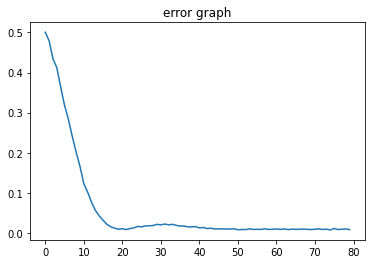

In [29]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [30]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.008999403558284208
test error : 0.00769203837882599


In [31]:
print(m,c)

0.6264998140188826 0.18734980907950669


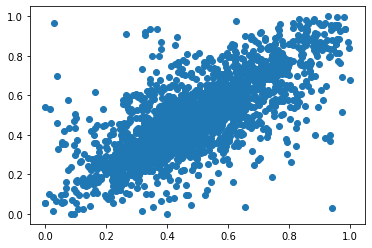

In [32]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

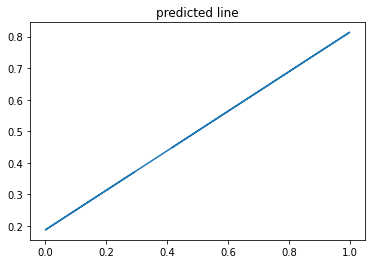

In [33]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

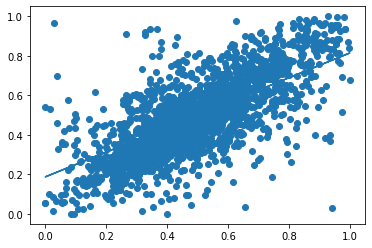

In [34]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [35]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4123
predicted load for this hour is :  4868.344828905292
